## Εθνικό Μετσόβιο Πολυτεχνείο 
## Σχολή Ηλεκτρολόγων Μηχανικών & Μηχανικών Υπολογιστών


### Μάθημα: Στοχαστικές διαδικασίες
### Διδάσκων: Μιχαήλ Λουλάκης
### Ακαδημαϊκό έτος: 2017-2018

### Ιωάννης Κ. Γεωργακόπουλος
### Α.Μ.: 03111512

# 4η Εργαστηριακή Άσκηση

Σε αυτό το εργαστήριο κάνουμε περιπάτους. Συγκεκριμένα θα υπολογίσουμε χρόνους διαφυγής για διάφορους περιπάτους στον $\mathbb{Z}$ και $\mathbb{Z}^2$.

Στα πλαίσια του εργαστηρίου θα χρησιμοποιήσουμε τις παρακάτω βιβλιοθήκες.

In [1]:
import numpy as np
from numpy.random import choice

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)  # default figure size

## Άσκηση 1

Για τον απλό τυχαίο περίπατο, μέχρι αυτός να βγει από το $[-70, 100]$ θα προσομοιώσουμε:

* 500 διαδρομές με τάση προς τα αριστερά $p(k, k+1) = \frac{1}{5}, p(k,k-1) = \frac{4}{5}$
* 500 διαδρομές με τάση προς τα δεξιά $p(k, k+1) = \frac{4}{5}, p(k,k-1) = \frac{1}{5}$

Ας ξεκινήσουμε:

Θα εργαστούμε με συναρτήσεις γεννήτριες. Για αρχή φτιάχνουμε την συνάρτηση που θα χρησιμοποιήσουμε για τον περίπατο στον $\mathbb{Z}$.

In [2]:
np.random.seed(2017)  # for reproducibility

# random walk generator:
def rand_walk_Z(start, probs):
    x = start
    steps = [-1, 1]  # probs order should be (left, right)
    while True:  # continue for ever in needed
        x += choice(steps, p=probs)
        yield x  # it's a generator!

probs = (0.5, 0.5)
walker = rand_walk_Z(0, probs)  # start a new markov chain #δοκιμάζουμε αν δουλεύει
for n in range(10):
    x = next(walker)  # take 1 step!
    print(x)

-1
0
-1
-2
-1
0
-1
-2
-3
-4


Στην συνέχεια, θα προσομοιώσουμε τους ζητούμενους περιπάτους στον $\mathbb{Z}$.

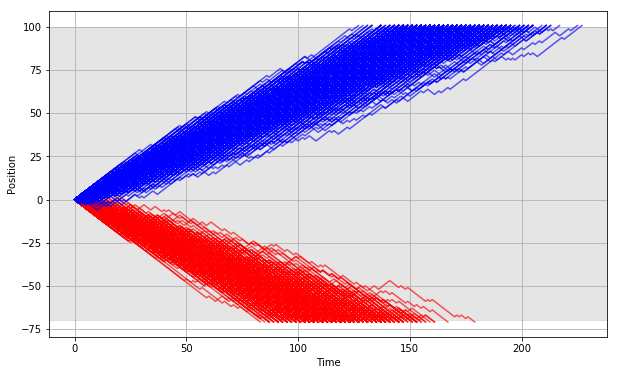

In [3]:
fig, ax = plt.subplots()  # initiate plots

a = -70  # lower boundary
b = 100  # upper boundary
N = 500  # sample size for each color

escape_timeR = np.zeros(N, dtype=int) # to store the exit time for Red
escape_timeB = np.zeros(N, dtype=int) # to store the exit time for Blue

for col in ['red', 'blue']:  # 2 sets of random walks r-ed, b-lue
    if col == 'red':           # διάλεξε πιθανότητες για κάθε περίπτωση 
        probs = (4/5, 1/5)
    else: 
        probs = (1/5, 4/5)
    escape_time = np.zeros(N, dtype=int)  # to store the exit time
    for n in range(N):    
        walker = rand_walk_Z(0, probs)   # start new walk from 0
        x = 0  # start position 0
        t = 0 # starting time 0
        chain = [x]  # save positions to plot
        while a <= x <= b:    
            x = next(walker)
            chain.append(x)
            t += 1
        escape_time[n] = t   #κρατάμε τον χρόνο εξόδου
        ax.plot(chain, color=col, alpha=0.65) #βάζουμε alpha 0.65 ωστε να είναι εμφανής η αλληλοεπικάληψη
    
    if col == 'red':                      #save the time for each color
        escape_timeR = escape_time
    else:
        escape_timeB = escape_time
        
# To look nicer
plt.axhspan(a, b, color = '#cccccc', alpha = 0.5)  # box between a & b
ax.grid()  # adds grid lines
plt.xlabel('Time')
plt.ylabel('Position')

# Show image!
plt.show()

## Σχόλια ερωτήματος 1:

Παρατηρούμε ότι τα 2 σύνολα διαδρομών παρουσιάζουν αντίστοιχη συμπεριφορά, με τάση προς τα πάνω και προς τα κάτω αντίστοιχα. Οι κόκκινες προφανώς τελειώνουν γρηγορότερα, αφού έχουν λιγότερη απόσταση να διανύσουν (70 αντί  100).

Στη συνέχεια, έχοντας αποθηκεύσει τους χρόνους εξόδου από την προηγούμενη προσομοίωση (των φρονίμων τα παιδιά και τα συναφή), κατασκευάζουμε μια εκτίμηση της κατανομής τους, σχεδιάζοντας το ιστόγραμμα των τιμών του στο δείγμα μας.

Στο παρακάτω κελί κώδικα σχεδιάζουμε αυτό το ιστόγραμμα χρησιμοποιώντας διαιρώντας το εύρος τιμών του `escape_time` σε 30 περιοχές (`bin=30`).

Θα χρησιμοποιήσουμε την εντολή Subplot για να τα 'χουμε δίπλα δίπλα να μη νιώθουν μοναξιά.

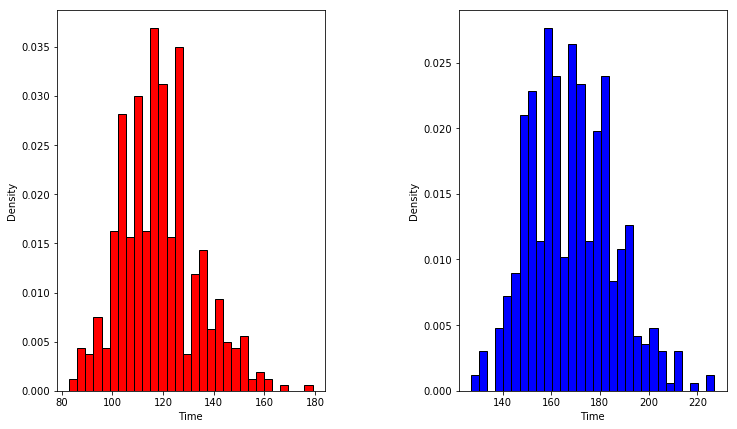

In [4]:
plt.figure(figsize=(12, 7))  # define figure size

# Right Axes
plt.subplot(1, 2, 1)  # setup subplots 1-row, 2-cols, select the 1st
plt.hist(escape_timeR, bins=30, color='red', edgecolor='black', normed=True)
plt.xlabel('Time')
plt.ylabel('Density')

# Left Axes
plt.subplot(1, 2, 2) # select the 2nd subplot
plt.hist(escape_timeB, bins=30, color='blue', edgecolor='black', normed=True)
plt.xlabel('Time')
plt.ylabel('Density')

plt.subplots_adjust(wspace = 0.5)  # specify the width space

## Σχόλια ερωτήματος 2:

Βλέπουμε ότι οι κατανομές είναι αντίστοιχες, και λαμβάνουν τιμές γύρω από μία κεντρική, η οποία είναι μετατοπισμένη δεξιότερα για την δεύτερη κατανομή, καθώς οι αλυσίδες της έχουν μεγαλύτερη απόσταση να διανύσουν σε σχέση με την πρώτη. Πάντως και οι 2 κατανομές έχουν μορφή που θυμίζει κανονική, γεγονός αναμενόμενο.

## Άσκηση 2:

Στη συνέχεια, θα δημιουργήσουμε μία αλυσίδα που να κινείται στον $\mathbb{Z}_+$ με πιθανότητες μετάβασης:

* Για $k > 0$: $p(k, k+1) = \frac{1}{3}$ και $p(k, k-1) = \frac{2}{3}$
* Για $k = 0$: $p(0, 1) = \frac{1}{3}$ και $p(0, 0) = \frac{2}{3}$

και θα την προσομοιώσουμε `1000` φορές. Ακολουθεί ο υπέροχος κώδιξ.

Αρχικά θα πρέπει να ξαναχτίσουμε τη συνάρτηση γεννήτρια, ωστε να υποστηρίζει τον περίπατο μόνο στον $\mathbb{Z}_+$. 

In [5]:
def rand_walk_Zp(start, probs):
    x = start
    step0 = [ 0, 1] # επιλογές όταν βρίσκεται στο 0
    steps = [-1, 1] # probs order should be (left, right)
    while True:  # continue for ever if needed
        if x == 0:
            x += choice(step0, p=probs)
        else:
            x += choice(steps, p=probs)
        yield x  # it's a generator!

probs = (2/3, 1/3)              # Αρχικοποιούμε τις πιθανότητες
walker = rand_walk_Zp(0, probs)  # start a new markov chain #δοκιμάζουμε αν δουλεύει
for n in range(10):
    x = next(walker)  # take 1 step!
    print(x)

0
1
2
3
4
5
4
5
6
5


Στην συνέχεια, θα προσομοιώσουμε τους ζητούμενους περιπάτους στον $\mathbb{Z+}$.

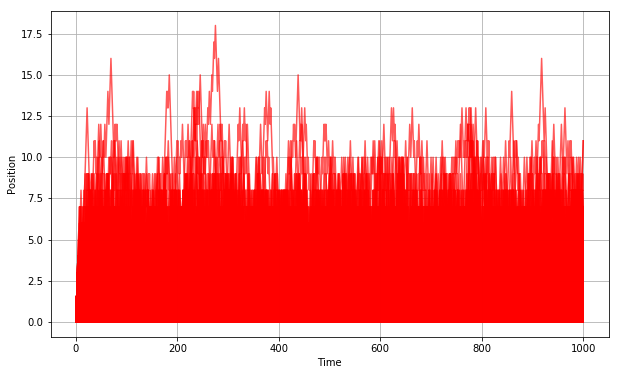

In [6]:
fig, ax = plt.subplots()  # initiate plots

N = 1000   # sample size for each color
escape_time = np.zeros(N, dtype=int)  # to store the exit time
x_100  = [] # η (αρχικά) κενή λίστα των x_100
M_1000 = [] # η (αρχικά) κενή λίστα των μεγίστων κάθε περιπάτου
for n in range(N):    
    walker = rand_walk_Zp(0, probs)   # start new walk from 0
    x = 0        # start position 0
    chain = [x]  # save positions to list
    for i in range (1000): #πλήθος βημάτων που μας ενδιαφέρουν    
        x = next(walker)
        chain.append(x)
    x_100.append(chain[100])  #λαμβάνουμε το 100ο στοιχείο σε κάθε έναν από τους 1000 περιπάτους.
    M_1000.append(max(chain)) #λαμβάνουμε το δεξιότερο στοιχείο σε κάθε έναν από τους 1000 περιπάτους.
    
    
    ax.plot(chain, color='red', alpha=0.65) #βάζουμε alpha 0.65 ωστε να είναι εμφανής η αλληλοεπικάληψη
    

# To look nicer
ax.grid()  # adds grid lines
plt.xlabel('Time')
plt.ylabel('Position')

# Show image!
plt.show()

   Για τους ψαγμένους, το παραπάνω διάγραμμα εμπεριέχει αρκετή πληροφορία, αλλά μιας και δεν ζητείται, ας προχωρήσουμε στην κατασκευή των ζητούμενων ιστογραμμάτων.

## Ερώτημα 1

Ακολουθεί ο κώδιξ για το ιστόγραμμα της θέσης $x_{100}$ όπου βρίσκεται η αλυσίδα μετά το εκατοστό βήμα της.

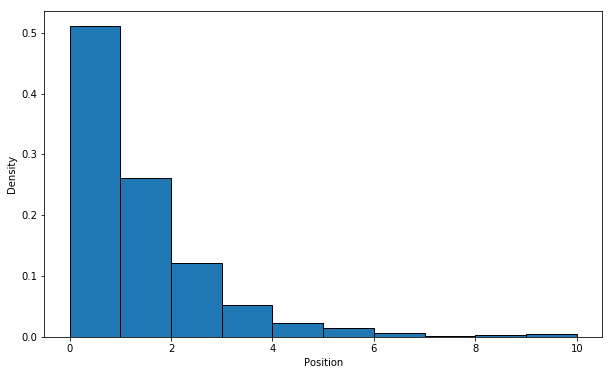

In [7]:
plt.hist(x_100, bins=max(x_100), edgecolor='black', normed=True)
plt.xlabel('Position')
plt.ylabel('Density')
plt.show()

## Ερώτημα 2

Ακολουθεί ο κώδιξ για το ιστόγραμμα κατανομής της δεξιότερης θέσης $M_{1000}$ όπου βρέθηκε η αλυσίδα μετά από $1000$ βήματα.

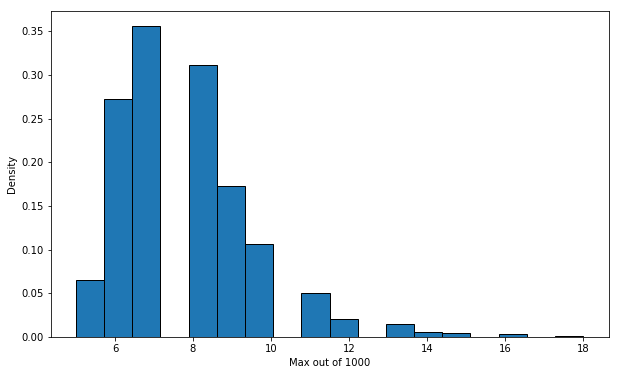

In [8]:
plt.hist(M_1000, bins=max(M_1000), edgecolor='black', normed=True)
plt.xlabel('Max out of 1000')
plt.ylabel('Density')
plt.show()

Στη συνέχεια, θα υπολογίσουμε την μέση τιμή και τη διασπορά της.

In [9]:
import statistics as stat    ## import the library statistics. We will use it to compute the mean and variance of our list

print(
    """ 
    Η μέση τιμή είναι {0:.2f} και η διακύμανση {1:.2f}
    """.format(stat.mean(M_1000), stat.variance(M_1000))
)
    ## compute the mean and variance of the elements in our list keeping only 5 decimal digits

 
    Η μέση τιμή είναι 7.00 και η διακύμανση 3.00
    


## Άσκηση 3

Για τον τυχαίο περίπατο στο $\mathbb{Z}^2$

Θα προσομοιώσουμε 500 αλυσίδες και θα υπολογίσουμε το μέσο χρόνο που κάνει μια αλυσίδα για να βγει από τον δίσκο ακτίνας:

$$ R = 10, 20, ..., 100 $$

Ας ξεκινήσουμε. Για να υλοποιήσουμε τον τυχαίο περίπατο στο $\mathbb{Z}^2$ πρέπει να δημιουργήσουμε μια νέα γεννήτρια. Στο παρακάτω κελί έχουμε κατασκευάσει την `rand_walk_Z2`.

Η λογική είναι η ίδια με την `rand_walk_Z` απλά αυτή τη φορά:

* χρησιμοποιούμε 2 μεταβλητές `x, y` για να προσδιορίσουμε τη θέση
* η `steps` είναι μια λίστα από πίνακες που παριστάνουν τις δυνατές μετατοπίσεις
* Σε κάθε επανάληψη διαλέγουμε ένα στοιχείο της `steps` και το προσθέτουμε στα `x` και `y` αντίστοιχα

In [10]:
# random walk in Z^2 generator:
def rand_walk_Z2(start=(0, 0), probs=(0.25, 0.25, 0.25, 0.25)):
    # probs order (left, right, bottom, up)
    x, y = start
    steps = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    while True:
        dx, dy = steps[choice(4, p=probs)]  # choice(4) = choose a number in [0,3]
        x, y = x + dx, y + dy
        yield x, y

Στη συνέχεια υλοποιούμε τον απλό συμμετρικό περίπατο στον $\mathbb{Z}^2$ μέχρι να βγούμε από τον δίσκο ακτίνας $R = 10, 20, ..., 100$.

Το παρακάτω κελί κώδικα προσομοιώνει αυτή την αλυσίδα 500 φορές.

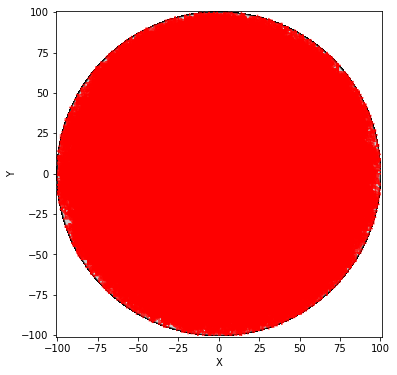

In [11]:
fig, ax = plt.subplots()  # initiate plots

Ra = 10  # O αρχικός κύκλος
Rb = 100 # Ο τελικός κύκλος
st = 10  # Το βήμα
N  = 500 # 500 προσομοιώσεις
C  = 10 # Πλήθος κύκλων

escape_time = np.zeros((C, N), dtype=int)  # Πίνακας αποθήκευσης τιμών (γραμμές=κύκλοι, στήλες, προσομοιωσεις)

for n in  range (N):  # 500 random walks  
    x, y = 0, 0  # start position 0
    X, Y = [0], [0]  # store positions
    t = 0    # παράμετρος χρόνου
    disc = 0 # παράμετρος δίσκου στον οποίο βρισκόμαστε
    walker = rand_walk_Z2()  # start new symmetric walk from 0, 0
    for r in range (Ra, Rb+1, st): # Μικρός κύκλος, Μεγάλος κύκλος +1 (ώστε να πιάσει κ τον μεγάλο), βήμα
        r2 = r**2                 # Τετράγωνο του εκάστοτε κύκλου για το while
        while x**2 + y**2 < r2:   # ελέγχουμε για την πρώτη φορά που θα περάσει τον κύκλο 
            x, y = next(walker)
            t += 1
            X.append(x)
            Y.append(y)
        escape_time[disc, n] = t # γεμίζει το στοιχείο του πίνακα που αντιστοιχεί 
        disc +=1                 # πάμε στον αμέσως μεγαλύτερο δίσκο
        
        #X = np.array(X) + np.random.randn(len(X))/3
        #Y = np.array(Y) + np.random.randn(len(Y))/3
        

        ax.plot(X, Y, color='red', alpha = 0.8)

        # To look nicer
        circle = plt.Circle((0, 0), r, color="#cccccc", ec='black', alpha=0.5)
        ax.add_artist(circle)  # draw a circle
        ax.set_xlim([-r-1, r+1])
        ax.set_ylim([-r-1, r+1])
        ax.set_aspect('equal')  # set aspect ratio 1:1
        ax.grid()  # adds grid lines
        plt.xlabel('X')
        plt.ylabel('Y')

# To Show image!
plt.show()

Παραπάνω έχουμε δημιουργήσει ένα plot που παρουσιάζει όλες τις διαδρομές που έγιναν μέχρι να βγουν από κάθε κύκλο, με τελικό τον $R=100$. Βλέπουμε ότι για τόσες πολλές προσομοιώσεις, έχουν περάσει σχεδόν από όλη την επιφάνεια ώστε σχηματίζεται η Ιαπωνική σημαία. kawaaiii.

Αρχικά, θα υπολογίσουμε τη μέση τιμή του χρόνου εξόδου από κάθε κύκλο.

In [12]:
import statistics as stat    ## import the library statistics. We will use it to compute the mean of our list
mean_et=[]                   ## create the empty list of mean escape time.
for disc in range(C):           
    temp = []
    for n in range(N):
        temp.append(escape_time[disc, n]) 
    mean_et.append(stat.mean(temp))
    print(mean_et) #Για να τσεκάρουμε ότι κάνει τη δουλειά του
    

[103]
[103, 418]
[103, 418, 965]
[103, 418, 965, 1714]
[103, 418, 965, 1714, 2556]
[103, 418, 965, 1714, 2556, 3761]
[103, 418, 965, 1714, 2556, 3761, 4981]
[103, 418, 965, 1714, 2556, 3761, 4981, 6357]
[103, 418, 965, 1714, 2556, 3761, 4981, 6357, 8072]
[103, 418, 965, 1714, 2556, 3761, 4981, 6357, 8072, 10056]


Ακολουθεί ο κώδιξ για την δημιουργία της σχέσης $R - χρόνου$ $εξόδου$ και του αντίστοιχου γραφήματος.

In [14]:
# Create a list of real numbers from start to end by step
start, end, step = Ra, Rb+1, st
x = np.arange(start, end, step) # Άξονας x, κύκλοι

y = mean_et #Άξονας y, μέσος χρόνος εξόδου.



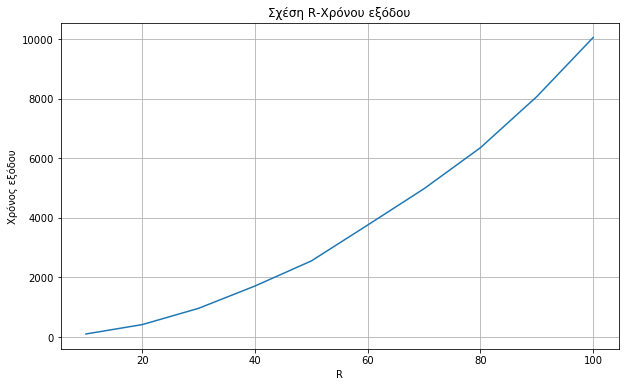

In [24]:
# Let's plot (x,y)
plt.figure()
plt.plot(x, y)
# Specify some extra attributes
plt.xlabel('R')
plt.ylabel('Χρόνος εξόδου')
plt.title('Σχέση R-Χρόνου εξόδου')
plt.grid(True)

Όμως δεν μας αρκεί αυτό, καθώς θέλουμε να σιγουρευτούμε για την σχέση που τα συνδέει. Γι'αυτό, θα κατασκευάσουμε άλλα 2 γραφήματα, ένα ημιλογαριθμικό και ένα λογαριθμικό, ωστέ να έχουμε ευκολότερη εικόνα και για τις τάξεις μεγέθους, καθώς και για να εκτιμήσουμε καλύτερα τη σχέση που τα συνδέει. 

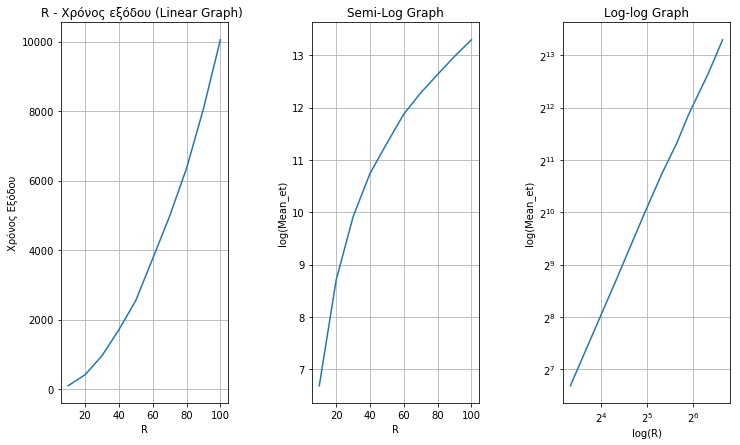

In [36]:
plt.figure(figsize=(12, 7))  # define figure size



# Left Axes
plt.subplot(1, 3, 1)  # setup subplots 1-row, 3-cols, select the 1st
plt.plot(x, y)
plt.xlabel('R')
plt.ylabel('Χρόνος Εξόδου')
plt.title('R - Χρόνος εξόδου (Linear Graph) ')
plt.grid(True)  # add grid-lines


# Mid Axes
newx = np.log2(x)
newy = np.log2(y)
plt.subplot(1, 3, 2)  # select the 2nd
plt.plot(x, newy)
plt.xlabel('R')
plt.ylabel('log(Mean_et)')
plt.title('Semi-Log Graph')
plt.grid(True)  # add grid-lines

# Right Axes
plt.subplot(1, 3, 3)  # select the 3rd
plt.loglog(x, y, basex=2, basey=2)
plt.xlabel('log(R)')
plt.ylabel('log(Mean_et)')
plt.title('Log-log Graph')
plt.grid(True)





plt.subplots_adjust(wspace = 0.5)  # specify the width space

In [40]:
# Υπολογίζουμε την κλίση της ευθείας στο λογαριθμικό γράφημα  
np.polyfit(newx, newy, 1)

array([ 1.97972793,  0.15332878])

## Σχόλια 

Βλέπουμε από τη λογαριθμική κλίμακα ότι η σχέση που συνδέει το χρόνο εξόδου με την ακτίνα του δίσκου R, είναι πολυωνυμική. Συνεπώς, μπορούμε να εκτιμήσουμε με ακρίβεια τη σχέση τους, υπολογίζοντας την κλίση της ευθείας αυτής. Η κλίση αυτή υπολογίστηκε $1.97972793$ οπότε η σχέση που τις συνδέει είναι περίπου της μορφής $y=x^2$. Πολύ ενδιαφέρον αν θέλετε τη γνώμη μου.